# Final Assignment - Part 1

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [5]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import requests
sps=pd.read_csv("data/Software Professionals Salary.csv")

1. What is the shape (rows, cols) of the `sps` DataFrame? 

In [6]:
sps.shape

(22770, 8)

2. How many unique `Job Roles` are there in the dataset? 

In [7]:
x=len(sps["Job Roles"].unique())
print("the are " + str(x)  +" unique job roles")


the are 11 unique job roles


3. How many unique `Job Title` are there for the "Python" `Job Role`? 

In [8]:
y=len(sps[sps["Job Roles"]=="Python"]["Job Title"].unique())
print("the are " + str(y) + " unique job title for the Python job role")

the are 102 unique job title for the Python job role


4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [9]:
len(sps[(sps["Job Roles"]== "Python") & sps["Job Title"].str.contains("Analyst", case=False, na=False)]["Company Name"].unique())

3

5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [10]:
sps.groupby(["Company Name", "Job Title"])["Salaries Reported"].sum().sort_values(ascending=False).reset_index().head(1)


,Company Name,Job Title,Salaries Reported
0,Infosys,Test Engineer,701


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [11]:
len(sps[sps["Company Name"]=="Infosys"]["Location"].unique())

9

7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [12]:
#scrivi quale conversion rate stai usando
conversion_table= requests.get("https://open.er-api.com/v6/latest/USD")
exchange_total=conversion_table.json()
exchange_INR_USD=exchange_total["rates"]["INR"]
exchange_INR_USD=1/exchange_INR_USD
exchange_INR_USD
print("1 indian rupee equals to " + str(exchange_INR_USD) + " US dollar")


1 indian rupee equals to 0.0115590458428406 US dollar


8. What is the average `Salary USD` for the "Python" `Job Role`? 

In [13]:
sps["Salary USD"]= round(sps["Salary"]*exchange_INR_USD,0)
sps[sps["Job Roles"]=="Python"]["Salary USD"].mean().round(2)
print(f"the average salary for the Python role is {sps[sps["Job Roles"]=="Python"]["Salary USD"].mean().round(2)} USD")

the average salary for the Python role is 5618.03 USD


9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s? 

In [14]:
avg_USD_Salary=sps.groupby(["Company Name", "Job Title"])["Salary USD"].mean().sort_values(ascending=False).reset_index()
avg_USD_Salary.head(1)

,Company Name,Job Title,Salary USD
0,Thapar University,Software Development Engineer (SDE),1040314.0


10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

In [15]:
data_for_plotting=sps.groupby("Company Name", as_index=False)[["Salary USD","Rating"]].mean()

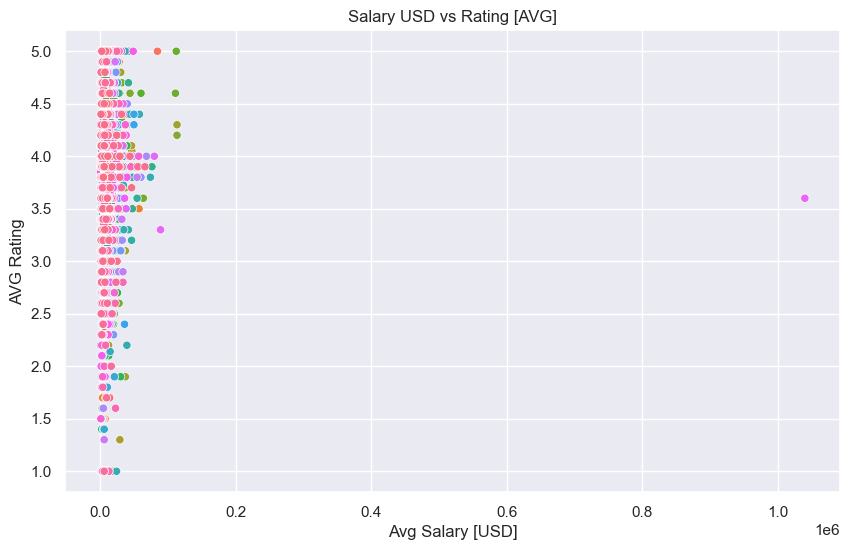

In [16]:
sns.set(rc={"figure.figsize": (10,6)})
sns.scatterplot(x="Salary USD", y="Rating", hue="Company Name", data=data_for_plotting, legend=None)
plt.title("Salary USD vs Rating [AVG]")
plt.xlabel("Avg Salary [USD]")
plt.ylabel("AVG Rating")
plt.show()

In [17]:
outlier=data_for_plotting[data_for_plotting["Salary USD"]>500000]
outlier

,Company Name,Salary USD,Rating
9413,Thapar University,1040314.0,3.6


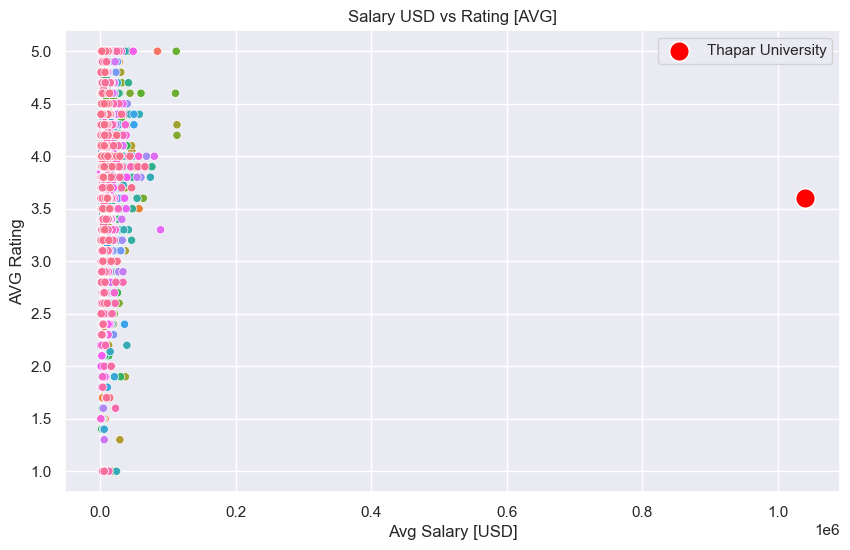

In [18]:
sns.scatterplot(x="Salary USD", y="Rating", hue="Company Name", data=data_for_plotting, legend=None)
sns.scatterplot(x="Salary USD", y="Rating", color="red", s=200, marker="o", data=outlier, label="Thapar University")
plt.title("Salary USD vs Rating [AVG]")
plt.xlabel("Avg Salary [USD]")
plt.ylabel("AVG Rating")
plt.show()
#the company name that is causing this oddity is the Thapar University